Let's plot 

$$P\left( {Y = k} \right) = \left( \begin{gathered}
  n \hfill \\
  k \hfill \\ 
\end{gathered}  \right){\theta ^k}{\left( {1 - \theta } \right)^{n - k}}$$

as a function of $\theta$ for $n=10$ and $k=7$.

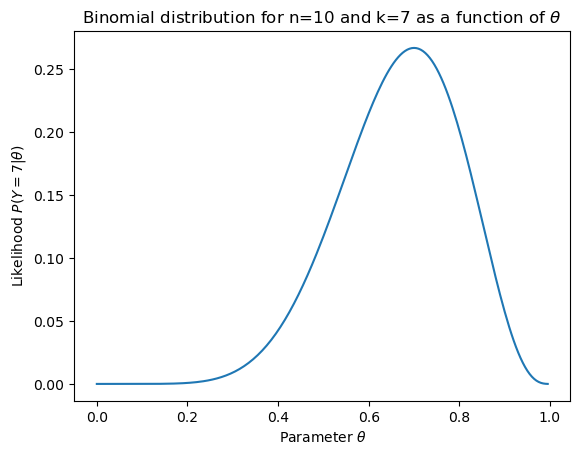

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n = 10
k = 7

_x = np.arange(0, 1, 0.005)
plt.plot(_x,binom.pmf(k,n,_x))
plt.title(r'Binomial distribution for n={0} and k={1} as a function of $\theta$'.format(n,k))
plt.xlabel(r'Parameter $\theta$')
plt.ylabel(r'Likelihood $P(Y={0}|\theta$)'.format(k))
plt.show()

Let's find the maximum value

In [30]:
from scipy import optimize

def f(x):
    return -binom.pmf(k,n,x)

# The default (Nelder Mead)
print(optimize.minimize(f, x0=0.1, bounds=[(0,1)]))

      fun: array([-0.26682793])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([8.54871725e-07])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 28
      nit: 3
     njev: 14
   status: 0
  success: True
        x: array([0.70000006])


The MLE is therefore 0.7.

Our likelihood is a binomial distribution

$$p\left( {y\left| {\theta ,N} \right.} \right) = \frac{{N!}}{{y!\left( {N - y} \right)!}}{\theta ^y}{\left( {1 - \theta } \right)^{N - y}}$$

This is a discrete distribution returning the probability of getting heads (or in general,
successes) out of coin tosses (or in general, trials or experiments) given a fixed value of $\theta$.

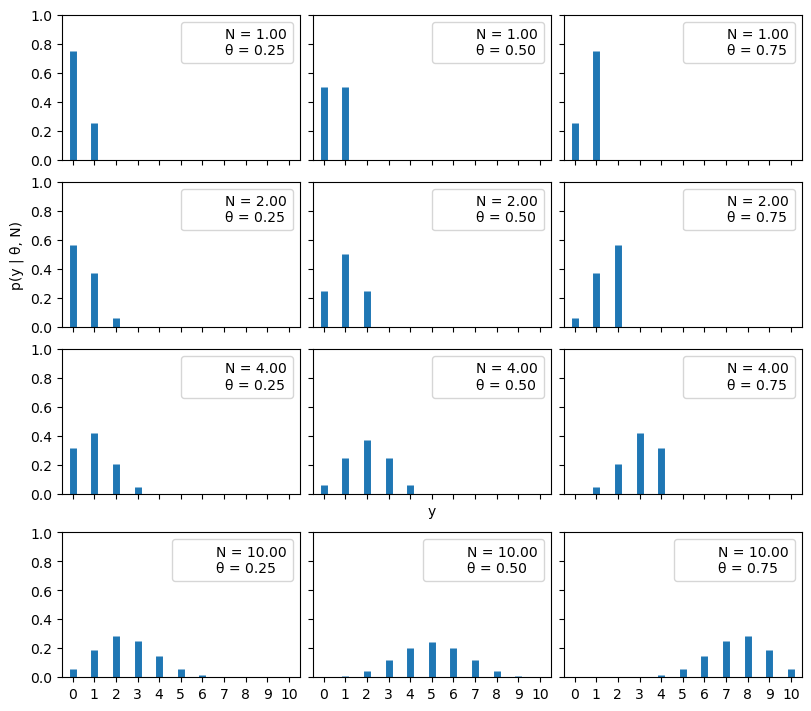

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

n_params = [1, 2, 4, 10] # Number of trials
p_params = [0.25, 0.5, 0.75] # Probability of success

x = np.arange(0, max(n_params)+1)
f,ax = plt.subplots(len(n_params), len(p_params), sharex=True, sharey=True, figsize=(8, 7), constrained_layout=True)

for i in range(len(n_params)):
    for j in range(len(p_params)):
        n = n_params[i]
        p = p_params[j]
        y = stats.binom(n=n, p=p).pmf(x)
        ax[i,j].vlines(x, 0, y, colors='C0', lw=5)
        ax[i,j].set_ylim(0, 1)
        ax[i,j].plot(0, 0, label="N = {:3.2f}\nθ = {:3.2f}".format(n,p), alpha=0)
        ax[i,j].legend()
        ax[2,1].set_xlabel('y')
        ax[1,0].set_ylabel('p(y | θ, N)')
        ax[0,0].set_xticks(x)

Let's calculate the integral $$\int\limits_0^1 {{\theta ^7}{{\left( {1 - \theta } \right)}^3}} $$

In [18]:
import scipy.integrate as integrate
integrate.quad(lambda x: (x**7)*((1-x)**3),0,1)

(0.0007575757575757576, 8.41078048958452e-18)

Let's plot the posterior distribution

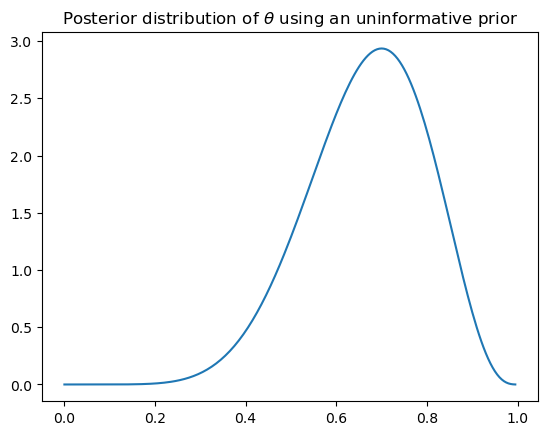

In [19]:
_integral = integrate.quad(lambda x: (x**7)*((1-x)**3),0,1)[0]

def pmf(x):
    return (1/_integral)*(x**7)*(1-x)**3

_x = np.arange(0, 1, 0.005)
plt.plot(_x,pmf(_x))
plt.title(r'Posterior distribution of $\theta$ using an uninformative prior')
plt.show()

As a prior, we will use a beta distribution, which is a very common distribution in
Bayesian statistics and looks as follows

$$p\left( \theta  \right) = \frac{{\Gamma \left( {\alpha  + \beta } \right)}}{{\Gamma \left( \alpha  \right)\Gamma \left( \beta  \right)}}{\theta ^{\alpha  - 1}}{\left( {1 - \theta } \right)^{\beta  - 1}}.$$


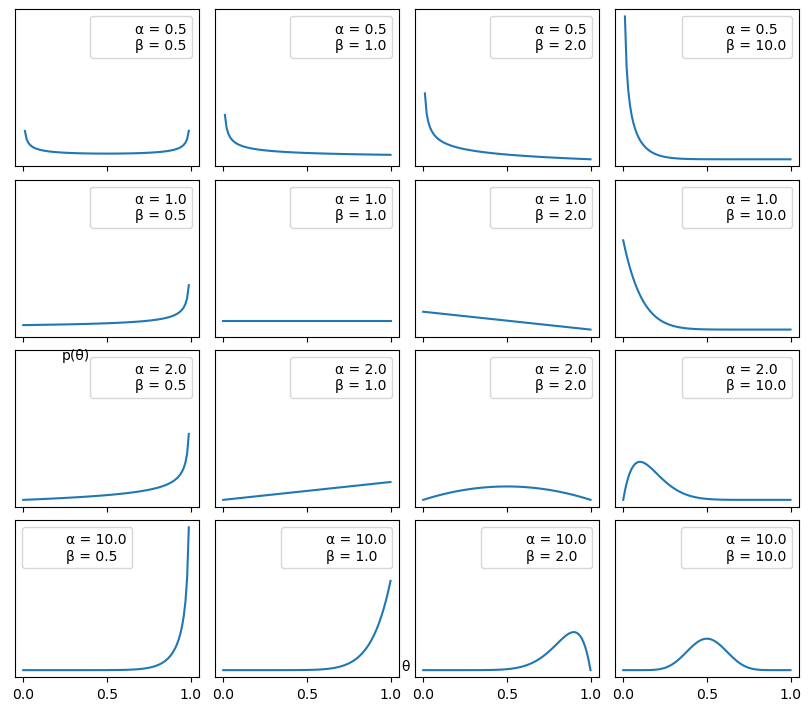

In [20]:
params = [0.5, 1, 2, 10]
x = np.linspace(0, 1, 100)
num_params = len(params)
f, ax = plt.subplots(num_params, num_params, sharex=True, sharey=True, figsize=(8, 7), constrained_layout=True)

for i in range(num_params):
    for j in range(num_params):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, label="α = {:2.1f}\nβ = {:2.1f}".format(a,b), alpha=0)
        ax[i,j].legend()

ax[1,0].set_yticks([])
ax[1,0].set_xticks([0, 0.5, 1])
f.text(0.5, 0.05, 'θ', ha='center')
f.text(0.07, 0.5, 'p(θ)', va='center', rotation=0)
plt.show()

There are many reasons to use a beta distribution for this and other problems. One of them is that the beta distribution is restricted to be between 0 and 1, in the same way our parameter is. In general, we use the beta distribution when we want to model proportions of a binomial variable. Another reason is for its versatility. As we can see in the preceding figure, the distribution adopts several shapes (all restricted to the $[0,1]$ interval), including a uniform distribution, Gaussian-like distributions, and U-like distributions.

As a third reason, the beta distribution is the conjugate prior of the binomial distribution (which we are using as the likelihood). A conjugate prior of a likelihood is a prior that, when used in combination with a given likelihood, returns a posterior with the same functional form as the prior. This menas that every time we use a beta distribution as the prior and a binomial distribution as the likelihood, we will get a beta as the posterior distribution. There are other pairs of conjugate priors; for example, the Normal distribution is the conjugate prior of itself.

For many years, Bayesian analysis was restricted to the use of conjugate priors. Conjugacy ensures mathematical tractability of the posterior, which is important given that a common problem in Bayesian statistics is ending up with a posterior we cannot solve analytically. This was a deal breaker before the development of suitable computational methods to solve probabilistic methods.

If $X$ has Beta distribution, then

$$E\left( X  \right) = \frac{\alpha }{{\alpha  + \beta }}\quad ,\quad Var\left( X  \right) = \frac{{\alpha \beta }}{{{{\left( {\alpha  + \beta } \right)}^2}\left( {\alpha  + \beta  + 1} \right)}}.$$

By Bayes' theorem,  the posterior is proportional to the likelihood times the prior, this is

$$p\left( {\theta \left| y \right.} \right) \propto \frac{{N!}}{{y!\left( {N - y} \right)!}}{\theta ^y}{\left( {1 - \theta } \right)^{N - y}}\frac{{\Gamma \left( {\alpha  + \beta } \right)}}{{\Gamma \left( \alpha  \right)\Gamma \left( \beta  \right)}}{\theta ^{\alpha  - 1}}{\left( {1 - \theta } \right)^{\beta  - 1}}.$$

Because the posterior is a function of $\theta$ we can drop all terms that don't depend on $\theta$, obtaining 

$$p\left( {\theta \left| y \right.} \right) \propto {\theta ^y}{\left( {1 - \theta } \right)^{N - y}}{\theta ^{\alpha  - 1}}{\left( {1 - \theta } \right)^{\beta  - 1}} \propto {\theta ^{y + \alpha  - 1}}{\left( {1 - \theta } \right)^{N - y + \beta  - 1}}.$$

This expression has the same functional form of a beta distribution (except for the normalization term) with $\alpha_{posterior}=\alpha_{prior}+y$ and $\beta_{posterior}=\beta_{prior}+N-y$.

So, 
$$p\left( {\theta \left| y \right.} \right) \sim Beta\left( {{\alpha _{prior}} + y,{\beta _{prior}} + N - y} \right).$$

Let's plot the posterior distribution

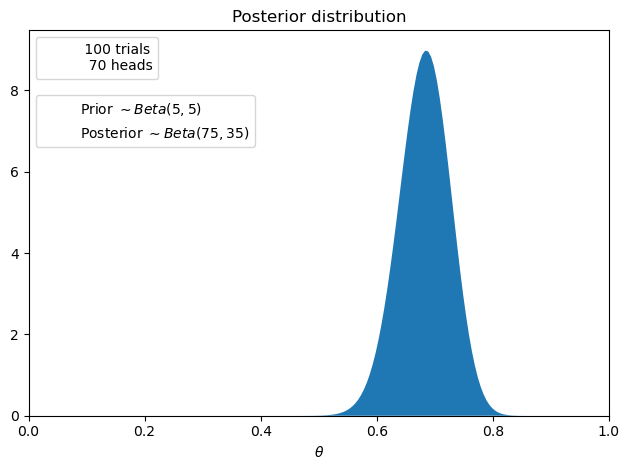

In [33]:
# Using Beta(1,1) as the prior
a_prior = 5
b_prior = 5


N = 100
y = 70

dist = stats.beta

x = np.linspace(0, 1, 200)
p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
plt.fill_between(x, 0, p_theta_given_y)


a_posterior = a_prior+y
b_posterior = b_prior+N-y

line1, = plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
line2, = plt.plot(0, 0, label=r"Prior $\sim Beta({0}, {1})$".format(a_prior, b_prior), alpha=0)
line3, = plt.plot(0, 0, label=r"Posterior $\sim Beta({0}, {1})$".format(a_posterior, b_posterior), alpha=0)
# Create a legend for the first line.
first_legend = plt.legend(handles=[line1], loc='upper left')

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

# Create another legend for the second line.
plt.legend(handles=[line2, line3], loc='upper left', bbox_to_anchor=(0, 0.85))

plt.xlim(0, 1)
plt.ylim(0, max(p_theta_given_y)+0.5)
plt.xlabel(r'$\theta$')
plt.title('Posterior distribution')
plt.tight_layout()

In [34]:
def draw_posterior(a_prior, b_prior, N, successes):
    """
        Given the parameters of the prior, the number of trials and the number of successes, 
        this function plots the posterior distribution and returns it.
    """
    y = successes
    x = np.linspace(0, 1, 200)
    dist = stats.beta(a=a_prior + y, b=b_prior + N - y)
    p_theta_given_y = dist.pdf(x)
    plt.fill_between(x, 0, p_theta_given_y)

    a_posterior = a_prior+y
    b_posterior = b_prior+N-y

    line1, = plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    line2, = plt.plot(0, 0, label=r"Prior $\sim Beta({0}, {1})$".format(a_prior, b_prior), alpha=0)
    line3, = plt.plot(0, 0, label=r"Posterior $\sim Beta({0}, {1})$".format(a_posterior, b_posterior), alpha=0)
    # Create a legend for the first line.
    first_legend = plt.legend(handles=[line1], loc='upper left')

    # Add the legend manually to the current Axes.
    ax = plt.gca().add_artist(first_legend)

    # Create another legend for the second line.
    plt.legend(handles=[line2, line3], loc='upper left', bbox_to_anchor=(0, 0.85))

    plt.xlim(0, 1)
    plt.ylim(0, max(p_theta_given_y)+0.5)
    plt.xlabel('θ')
    plt.title('Posterior distribution')
    plt.tight_layout()
    return dist

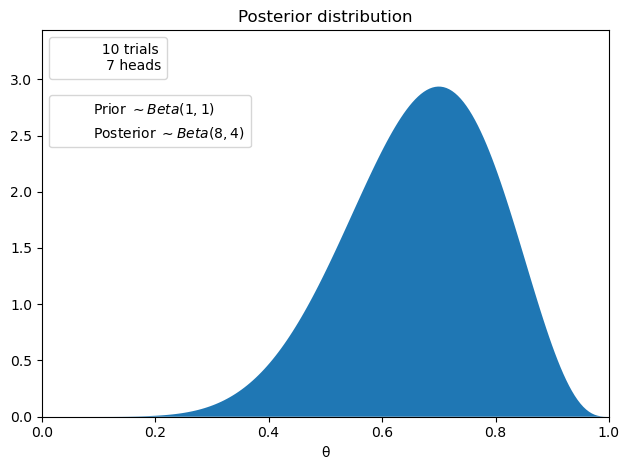

In [42]:
posterior_dist = draw_posterior(1,1,10,7)

In [43]:
print(posterior_dist.mean())
print(posterior_dist.var())

0.6666666666666666
0.017094017094017096


In [44]:
posterior_dist.cdf(0.6)-posterior_dist.cdf(0.4)

0.26700277759999996

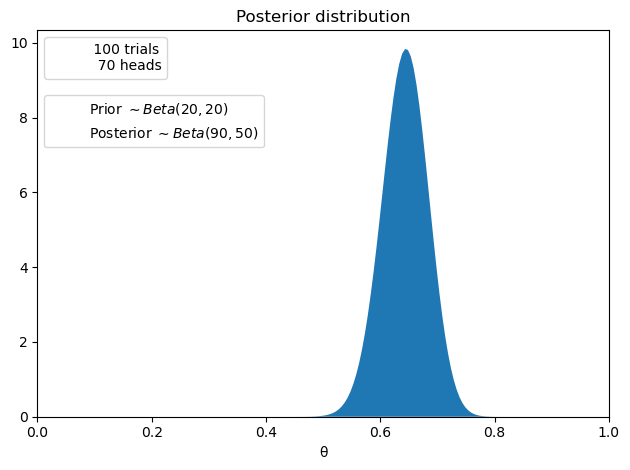

In [26]:
posterior_dist =draw_posterior(20,20,100,70)

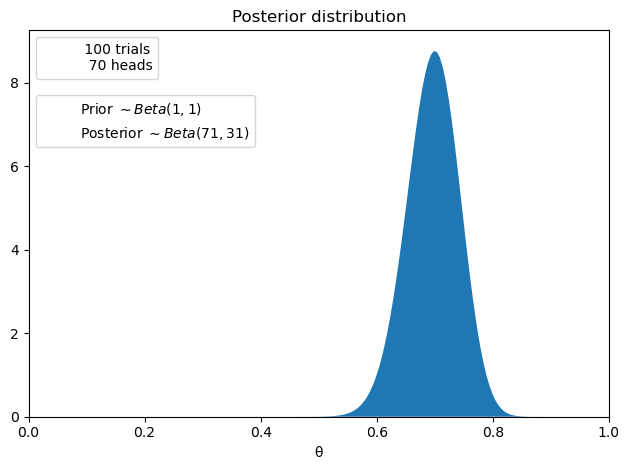

In [27]:
posterior_dist =draw_posterior(1,1,100,70)

Let's plot the posterior distribution for 3 different choices of the prior and different data sets.

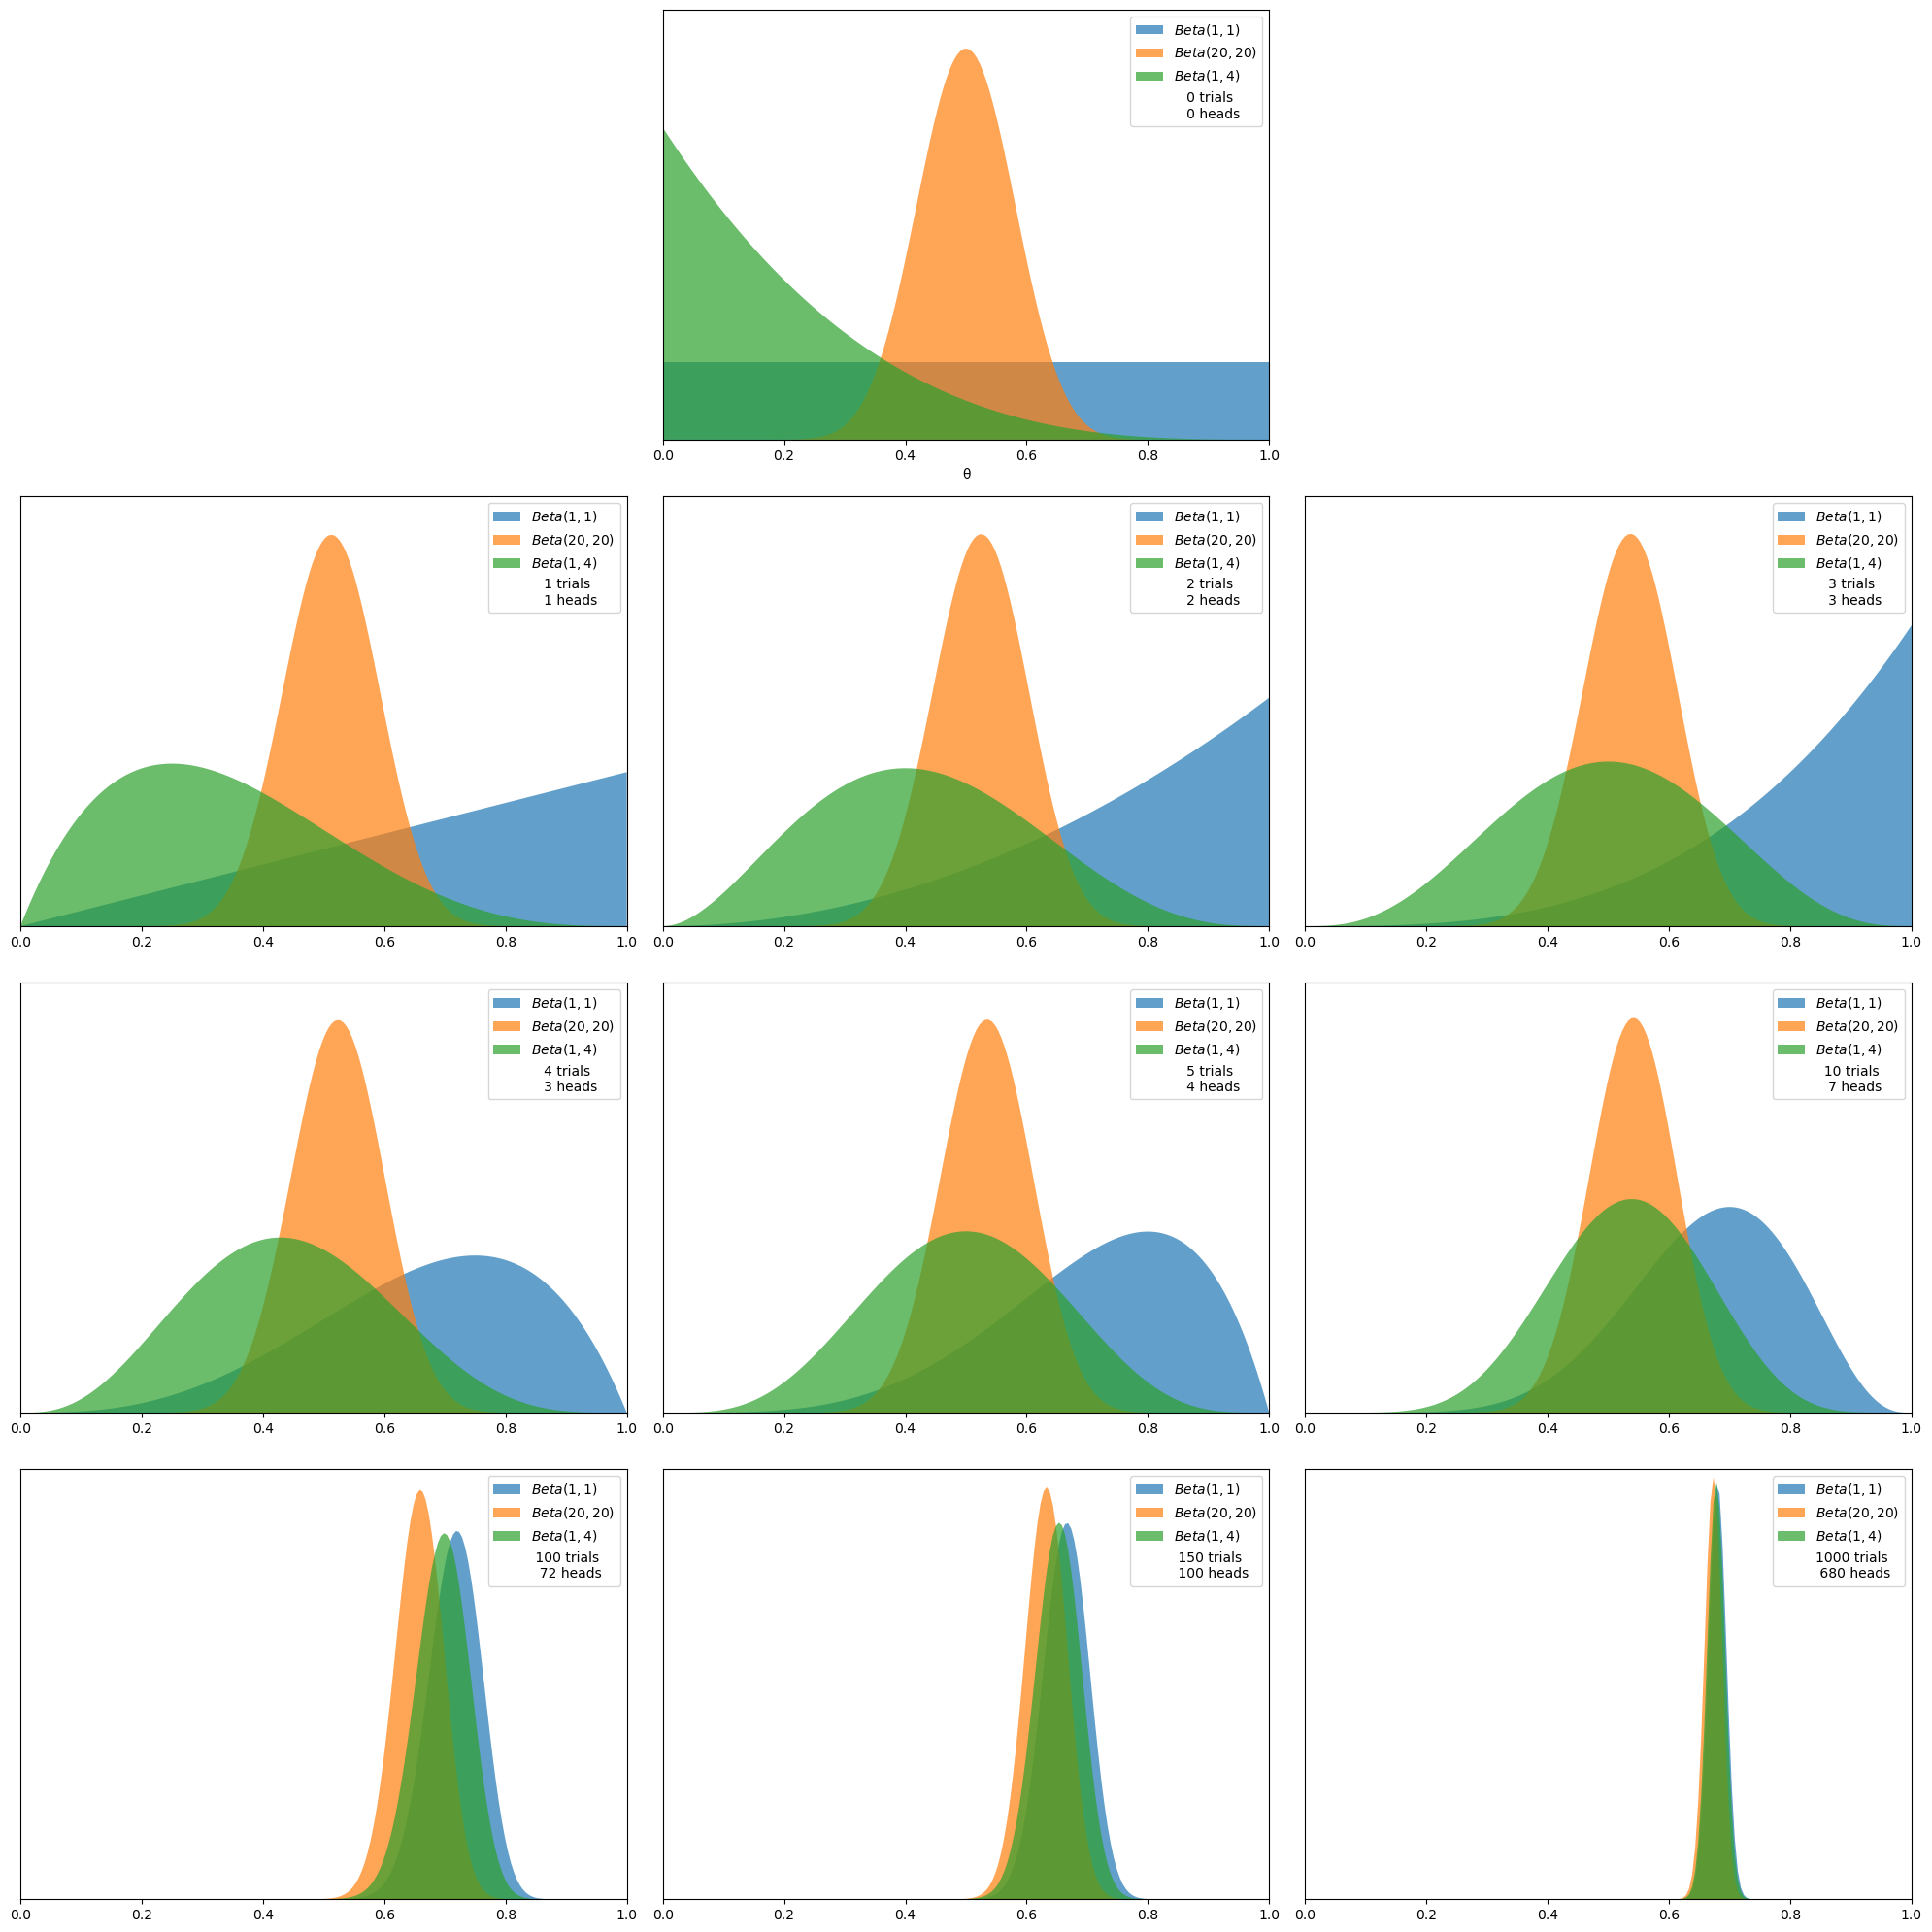

In [45]:
plt.figure(figsize=(20, 20))
n_trials = [0,1,2,3,4,5,10,100,150,1000]
data = [0,1, 2, 3, 3, 4, 7, 72, 100, 680]
beta_params = [(1, 1), (20, 20), (1, 4)]
dist = stats.beta
x = np.linspace(0, 1, 200)
for idx, N in enumerate(n_trials):
    max_y = 0
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        max_y = max(max_y, max(p_theta_given_y))
        plt.fill_between(x, 0, p_theta_given_y, alpha=0.7, label=r"$Beta({0}, {1})$".format(a_prior, b_prior))

    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, max_y+0.5)
    plt.legend()
    plt.yticks([])
plt.tight_layout()

The uniform (blue) prior represents all the possible values for the bias being equally probable a priori.

The orange prior (looks like a Gaussian distribution)  is centered and concentrated around 0.5, so this
prior is compatible with information indicating that the coin has more or less
about the same chance of landing heads or tails. We could also say this prior is
compatible with the belief that most coins are fair.

The skewed (green) prior puts the most weight on a tail-biased outcome.

## Some remarks

* The spread of the posterior is proportional to the uncertainty about the value of a parameter; the more spread out the distribution, the less certain we are.
* Intuitively, we are more confident in a result when we have observed more data
supporting that result. This is reflected on the posterior, the more certainty we have, the less spread the posterior is.
* Given a sufficiently large amount of data, two or more Bayesian models with
different non degenerated priors will tend to converge to the same result. In the limit of infinite
data, no matter which prior we use, all of them will provide the same posterior.
Remember that infinite is a limit and not a number, so from a practical point of
view, we could get practically indistinguishably posteriors for a finite and rather
small number of data points.
* How fast posteriors converge to the same distribution depends on the data and
the model. In the preceding figure, we can see that the posteriors coming from
the blue prior (uniform) and green prior (biased towards tails) converge faster to
almost the same distribution, while it takes longer for the orange posterior (the one
coming from the concentrated prior). In fact, even after 100 trials, it is somehow
easy to recognize the orange posterior as a different distribution from the two
others.
* We will get the same result if we
update the posterior sequentially than if we do it all at once. We can compute the
posterior 150 times, each time adding one more observation and using the
obtained posterior as the new prior, or we can just compute one posterior for the
150 tosses at once. The result will be exactly the same. This feature not only
makes perfect sense, it also leads to a natural way of updating our estimations
when we get new data, a situation common in many data-analysis problems.